In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import norm

sns.set(font_scale=1.2)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

<IPython.core.display.Javascript object>


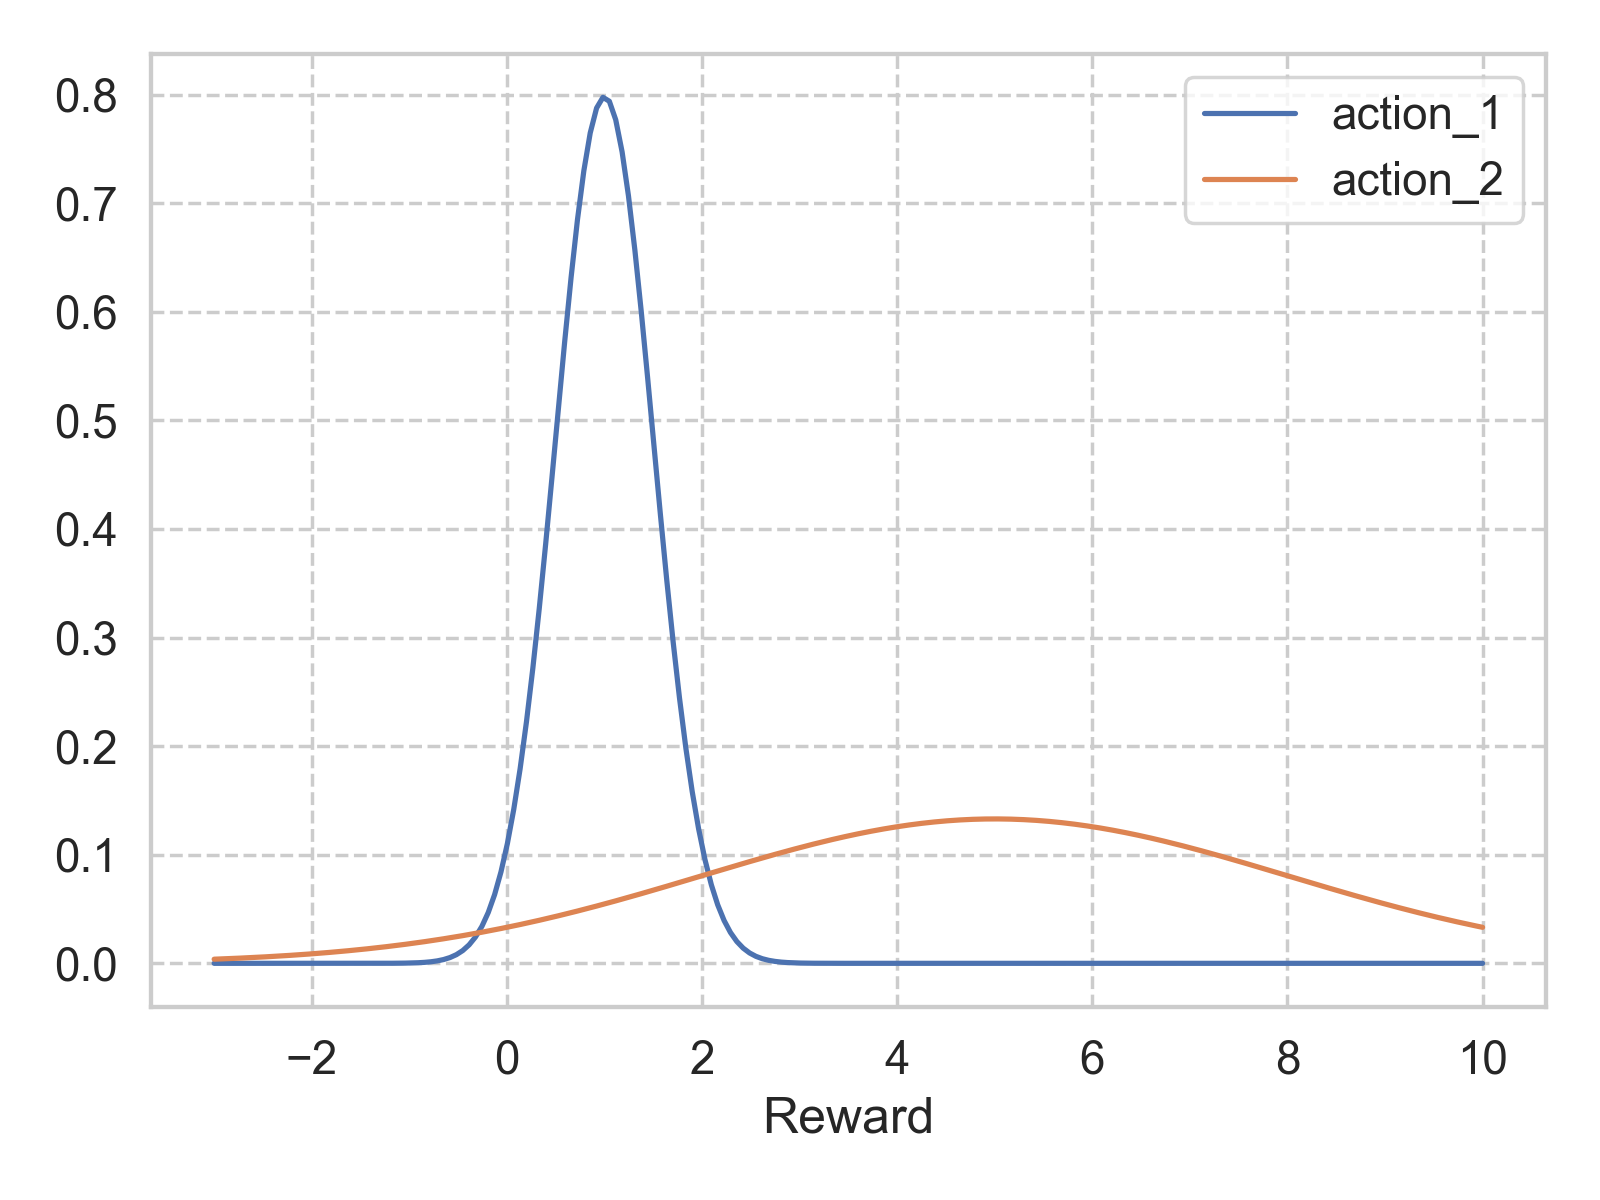

In [2]:
# demonstration of greedy policy
plt.figure()
mu_1 = 0
std_1 = 1

x = np.linspace(start=-3, stop=10, num=200)
plt.plot(x, norm.pdf(x, loc=1, scale=.5), label="action_1")
plt.plot(x, norm.pdf(x, loc=5, scale=3), label="action_2")
plt.legend()
plt.xlabel("Reward")
plt.tight_layout()
plt.show()

=====
Details about the testbed:
Number of arms: 10
Means of the arms: [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004]
Stds of the arms: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
The best arm is 6


<IPython.core.display.Javascript object>


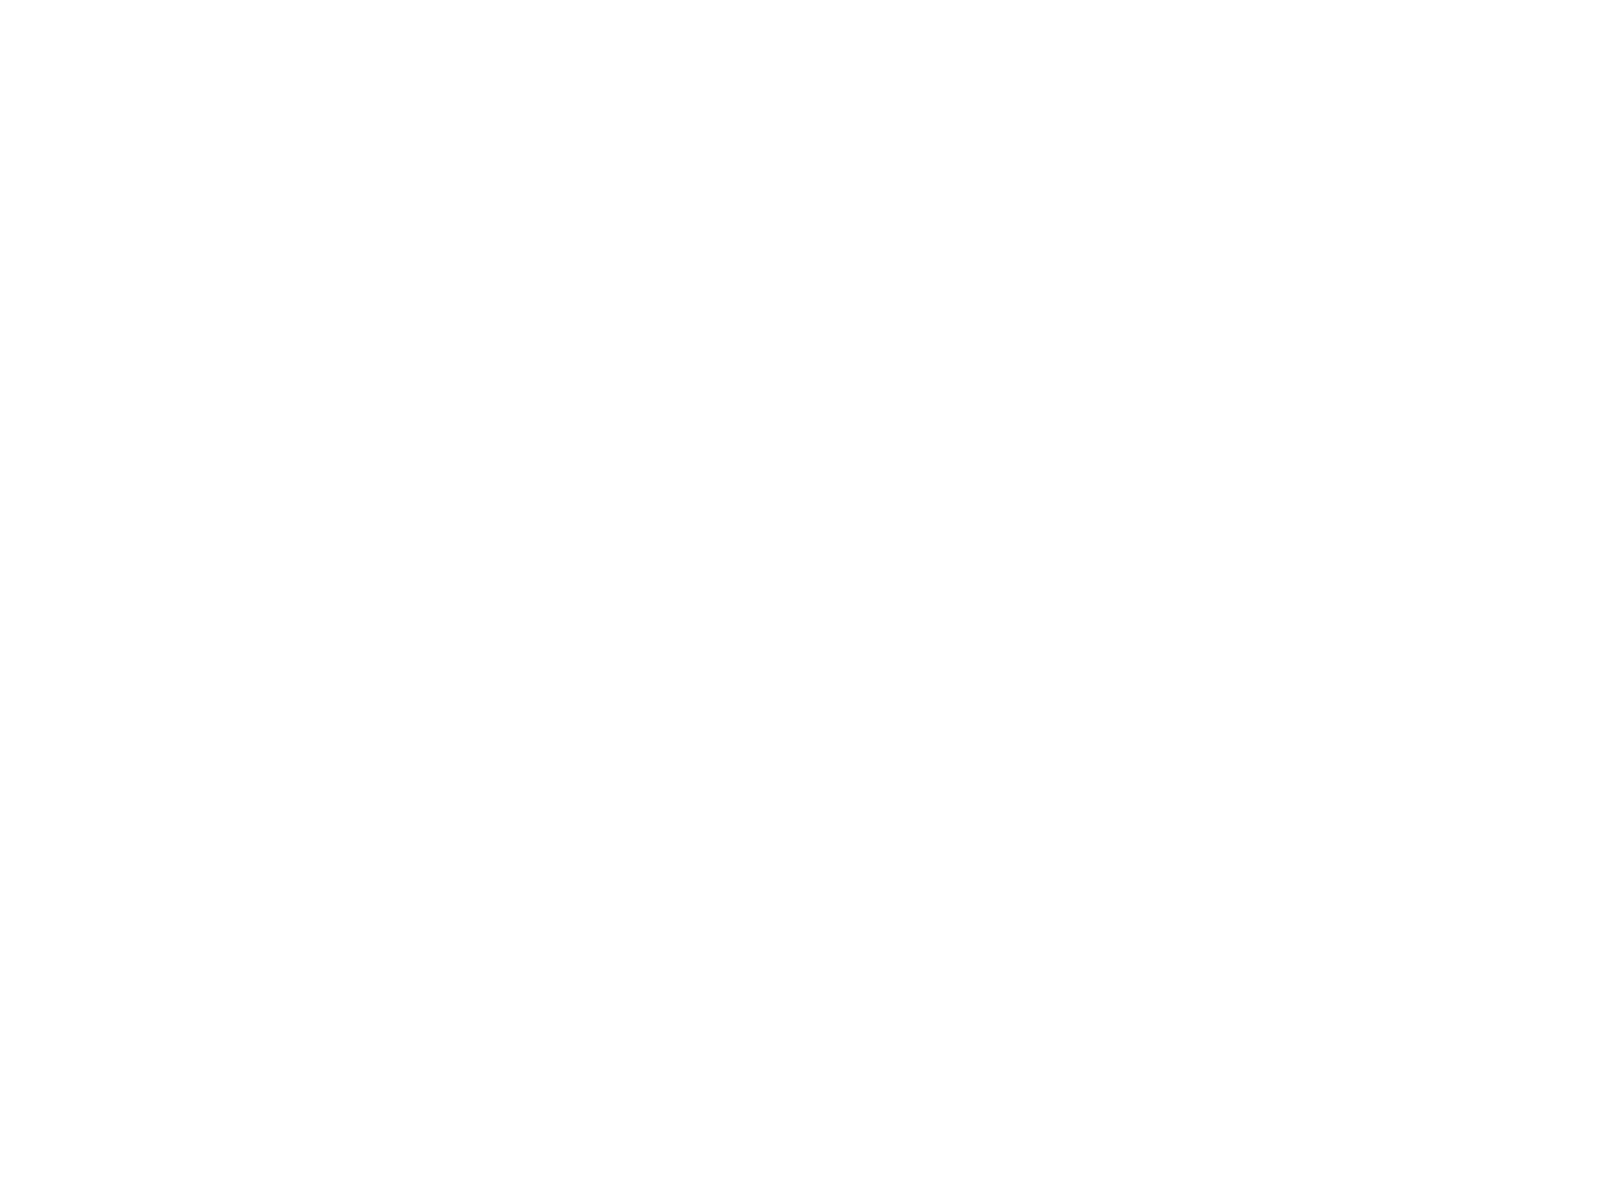

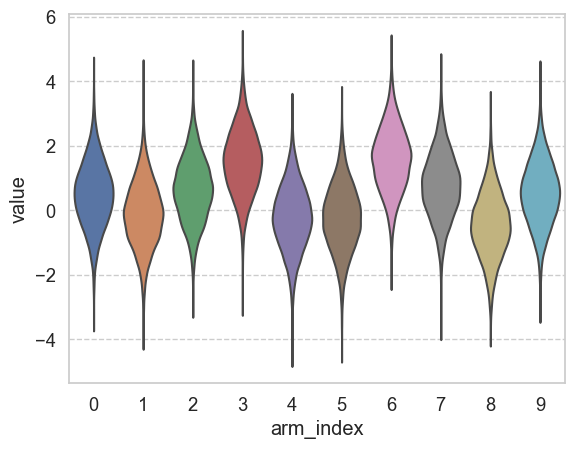

In [3]:
# 10-arm testbed
from typing import List
from multi_armed_bandit import TestBed, GreedyAgent, EpsilonGreedyAgent, UCBAgent, Simulation

def plot_rewards(steps: List[int], rewards: List[float], show_average: bool = False) -> None:
    """Plots the rewards of the agent as a function of steps."""
    plt.figure()
    sns.lineplot(x=steps, y=rewards)
    if show_average:
        sns.lineplot(x=steps, y=np.mean(rewards), linestyle="--")
    
    plt.xlabel("Steps")
    plt.ylabel("Rewards")
    plt.tight_layout()
    plt.show()
    
    return

def plot_actions(steps: List[int], actions: List[float]) -> None:
    """Plots the actions of the agent as a function of steps."""
    plt.figure()
    sns.scatterplot(x=steps, y=actions, linewidth=0)
    
    plt.xlabel("Steps")
    plt.ylabel("Actions")
    plt.tight_layout()
    plt.show()
    
    return


testbed = TestBed(num_arms=10)
testbed.describe()
testbed.visualize(n_samples=10000)

<IPython.core.display.Javascript object>


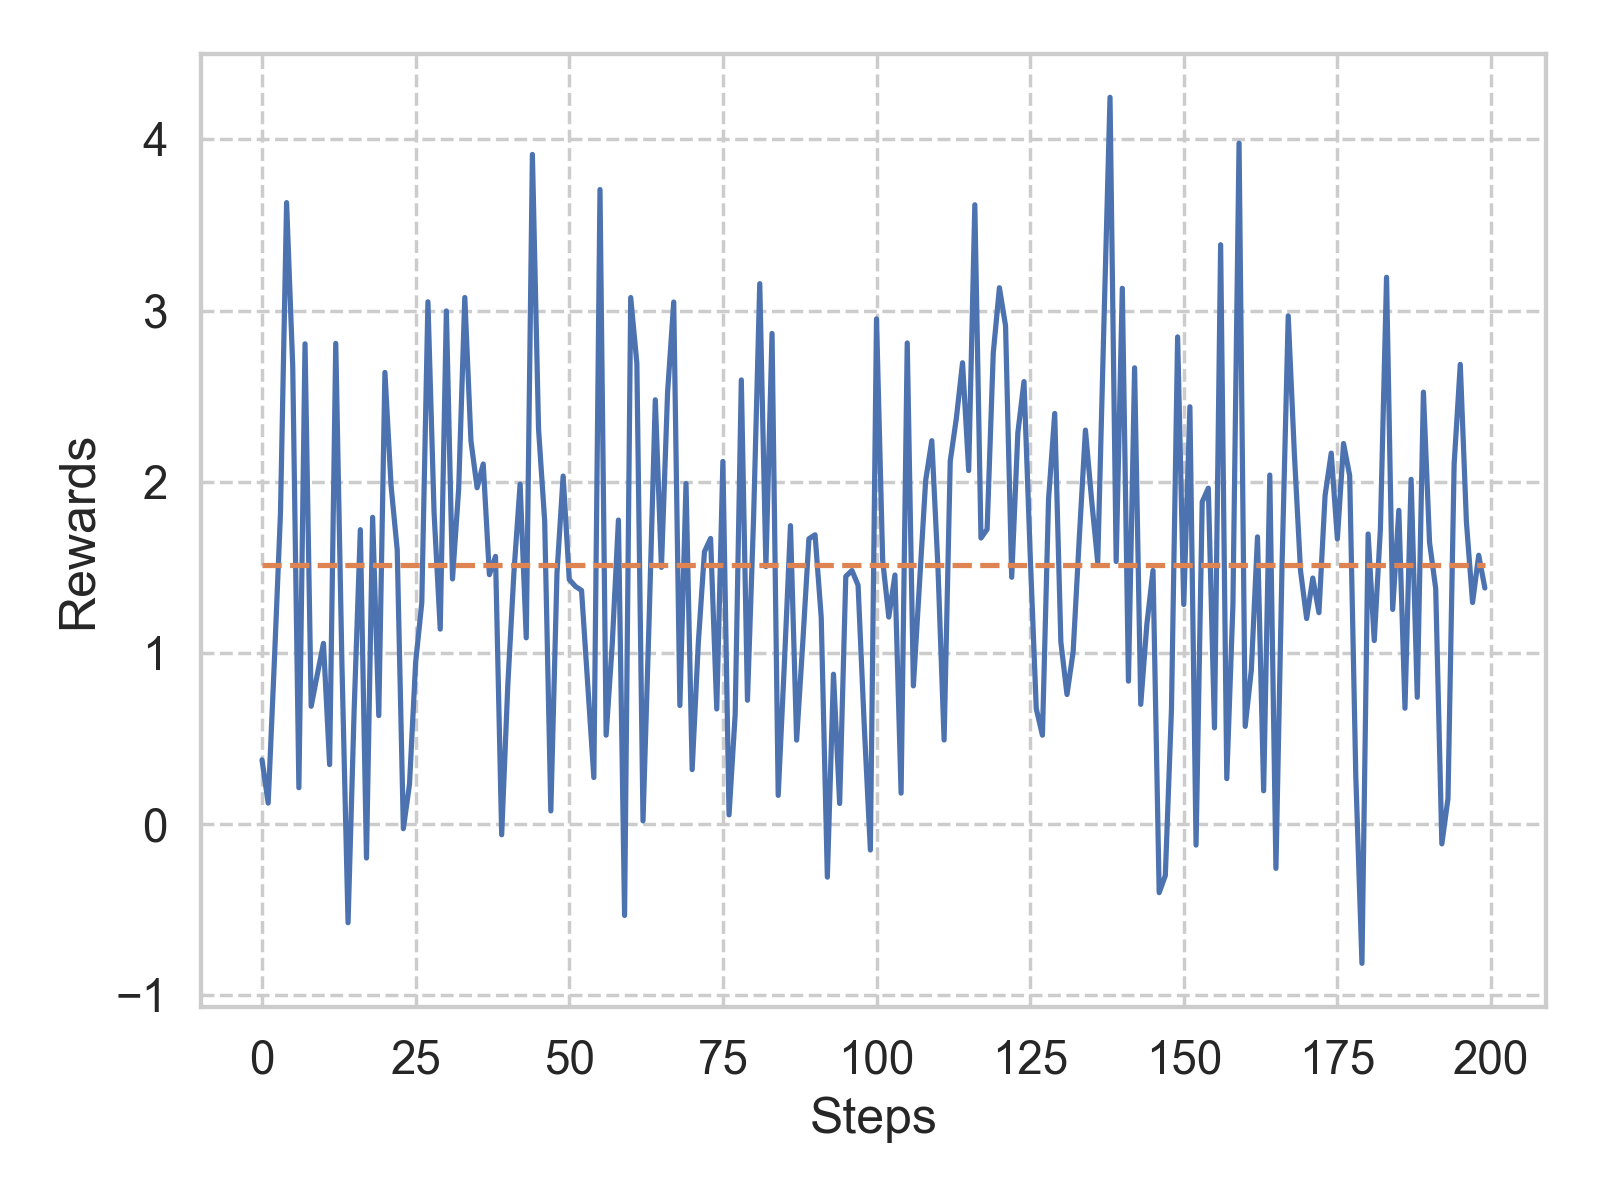

<IPython.core.display.Javascript object>


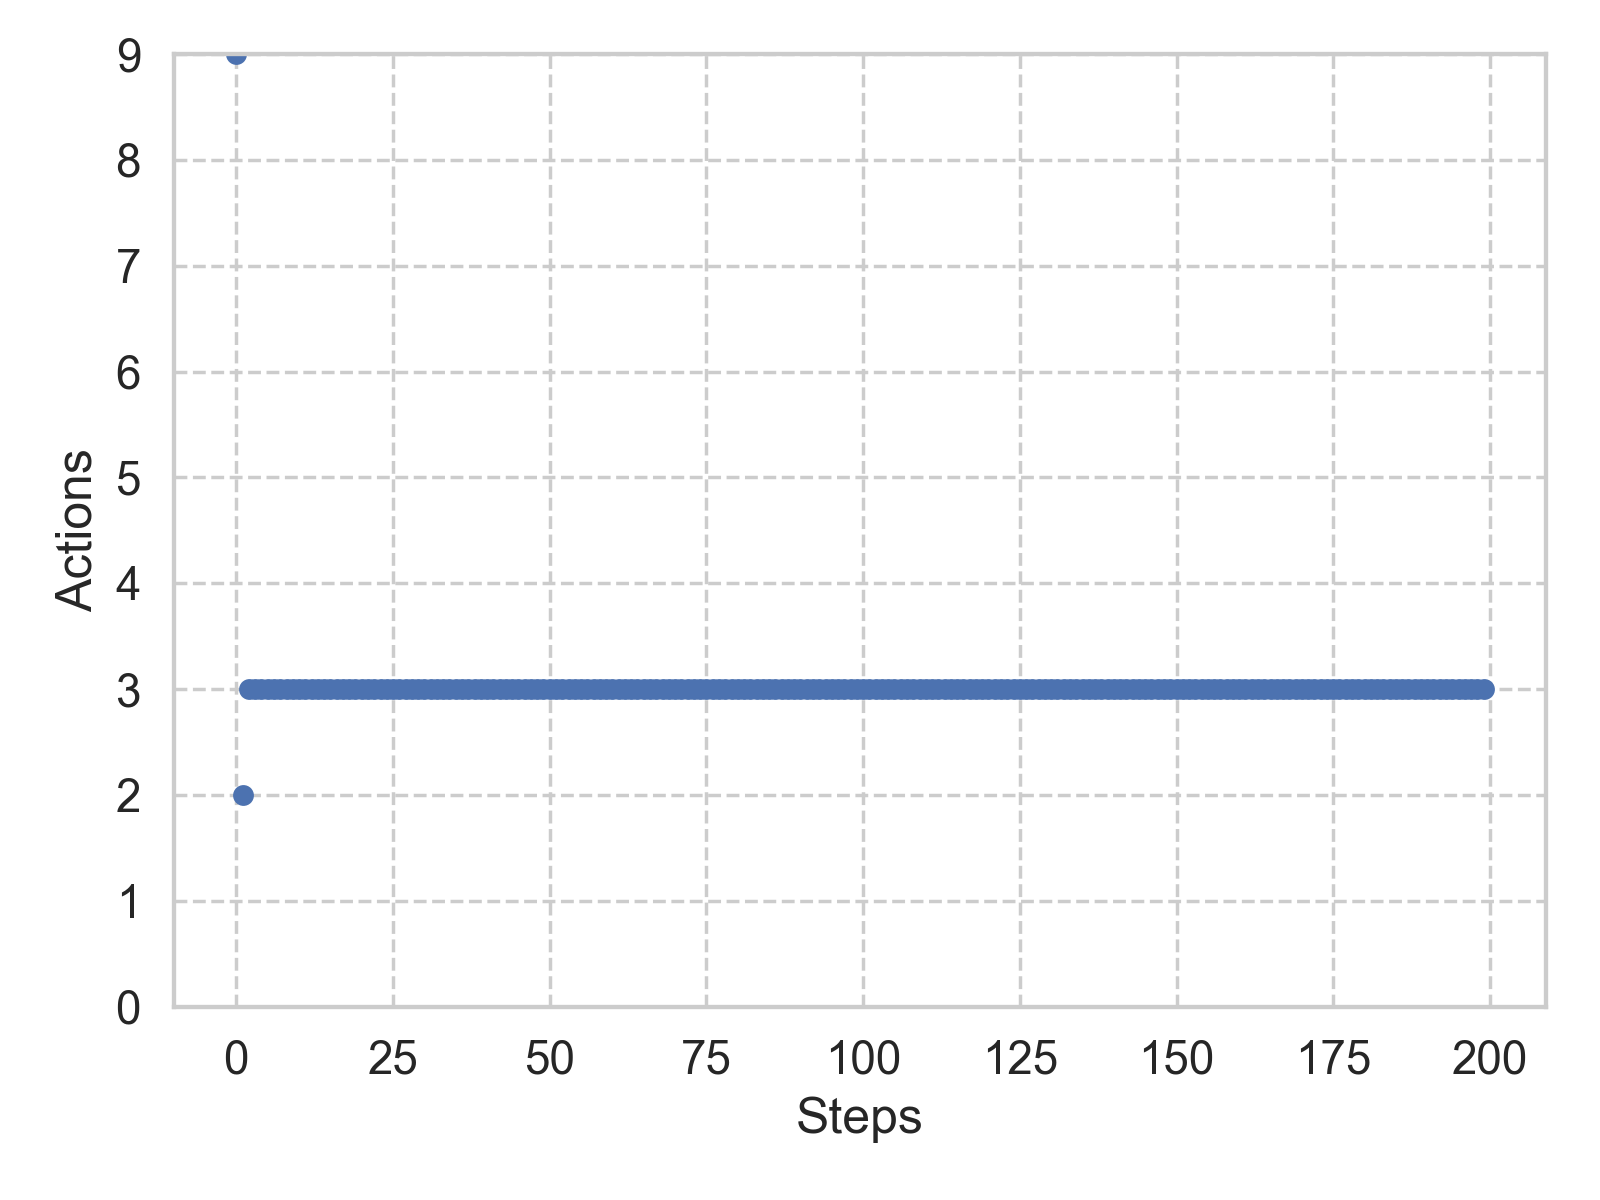

(0.0, 9.0)

In [5]:
# greed agent
n_steps = 200
agent = EpsilonGreedyAgent(env=testbed, epsilon=0.0)
agent.init_values(value=None)
agent.run(steps=n_steps)

plot_rewards(steps=list(range(n_steps)), rewards=agent.rewards_history, show_average=True)
plot_actions(steps=list(range(n_steps)), actions=agent.arms_history)
plt.ylim(0, 9)

<IPython.core.display.Javascript object>


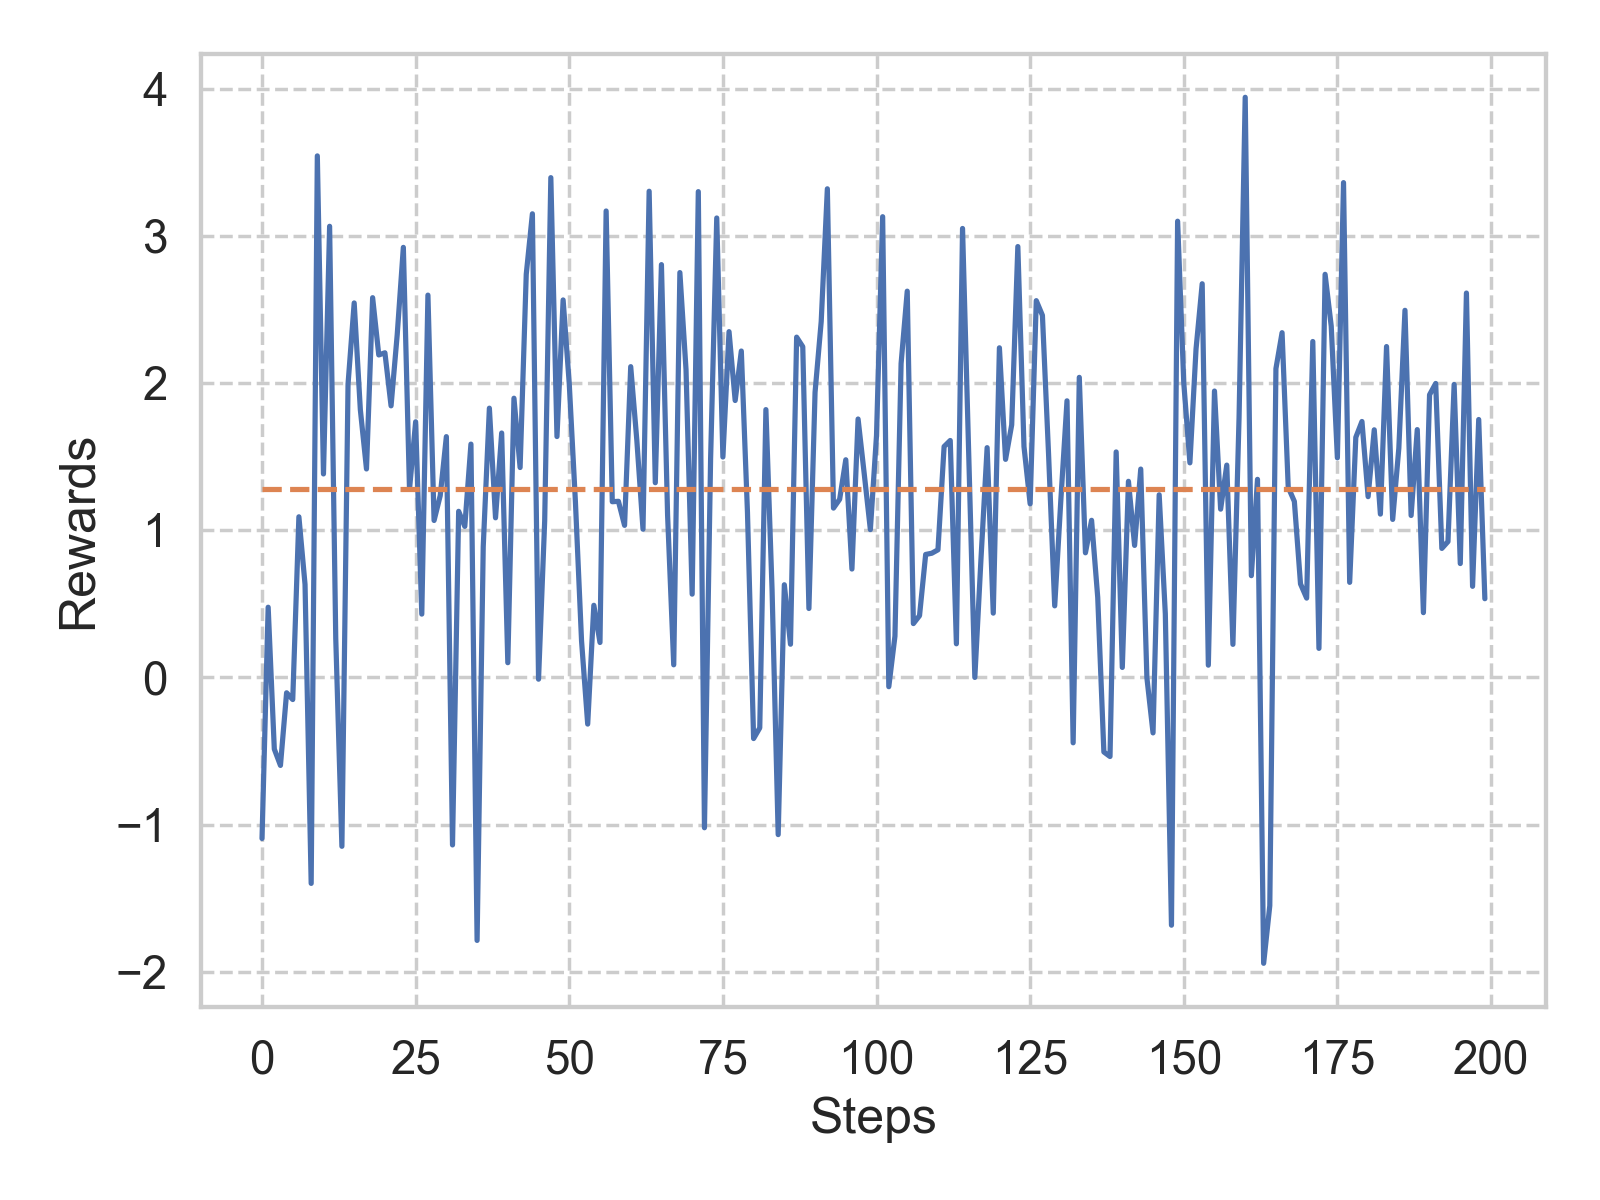

<IPython.core.display.Javascript object>


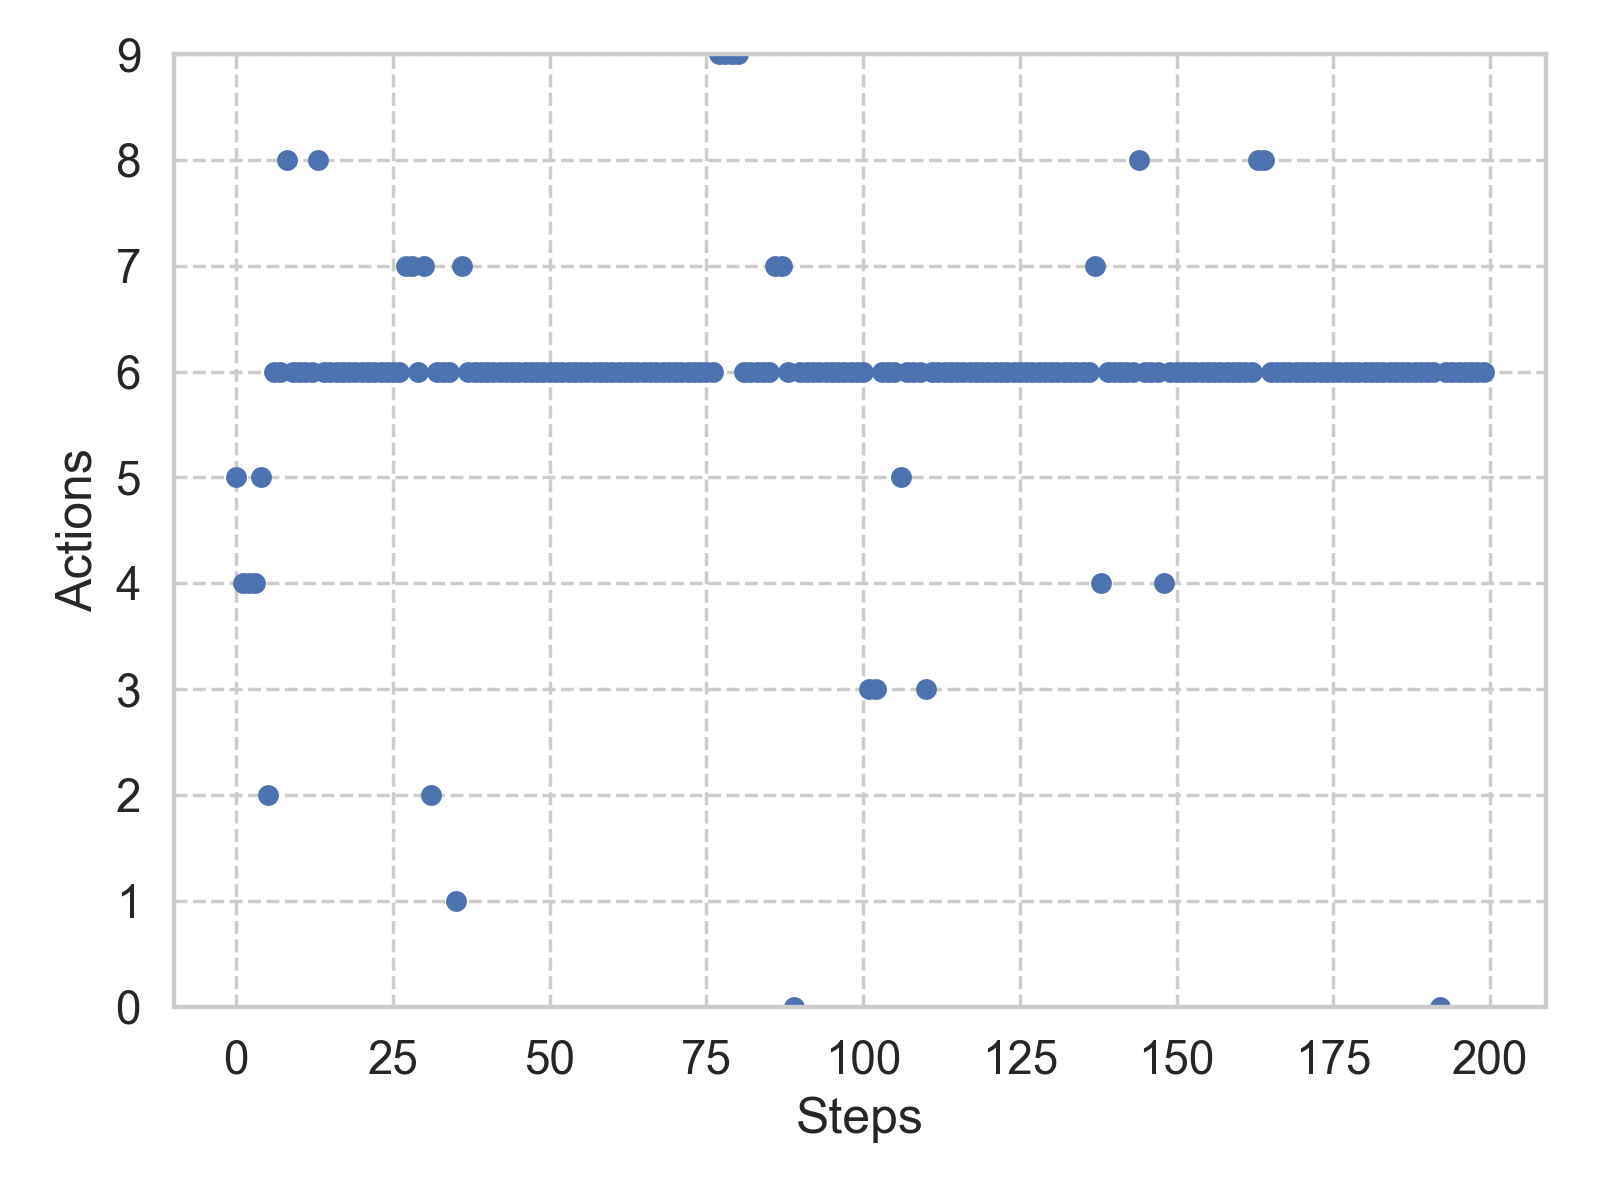

(0.0, 9.0)

In [6]:
# epsilon-greed agent
agent = EpsilonGreedyAgent(env=testbed, epsilon=0.1)
agent.init_values(value=None)
agent.run(steps=n_steps)

plot_rewards(steps=list(range(n_steps)), rewards=agent.rewards_history, show_average=True)
plot_actions(steps=list(range(n_steps)), actions=agent.arms_history)
plt.ylim(0, 9)

Simulation running: 100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.81it/s]


<IPython.core.display.Javascript object>


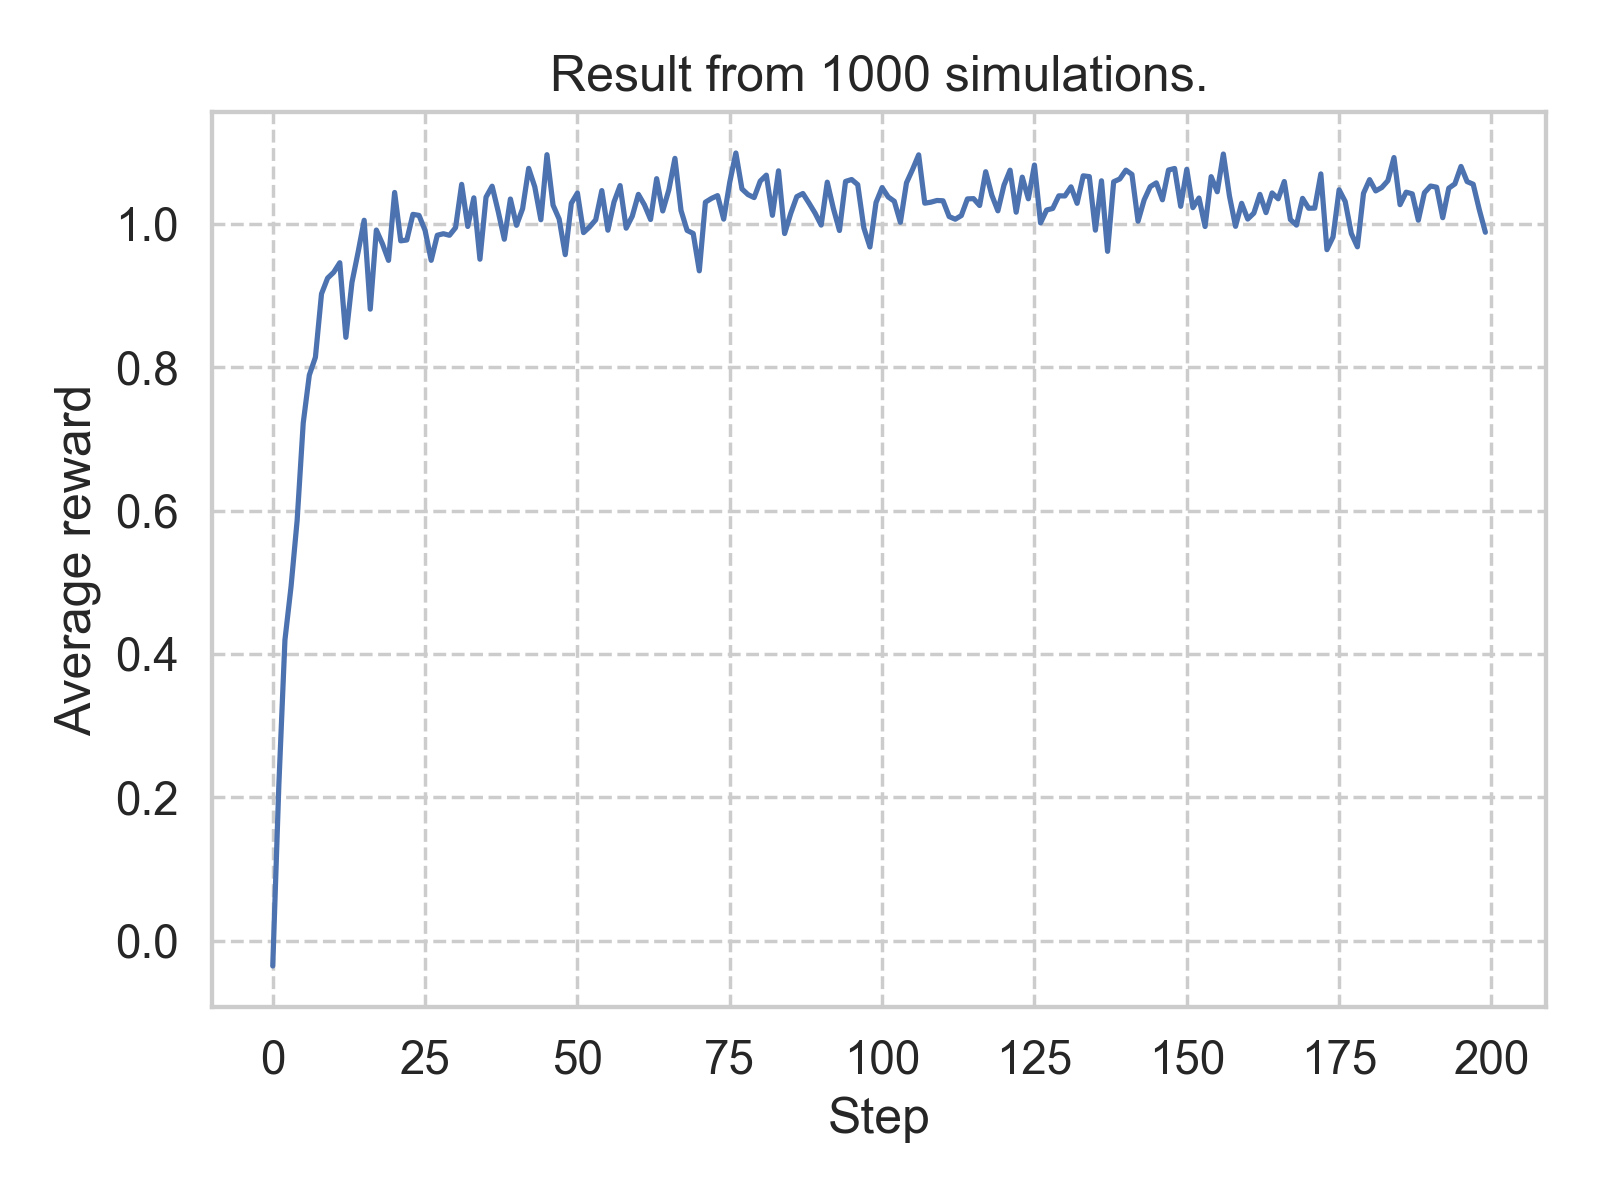

In [7]:
n_simulations = 1000

simulation_greedy = Simulation(
    env_type=TestBed,
    agent_type=GreedyAgent,
    num_agents=n_simulations,
    init_value=None,
    step=n_steps,
    env_kwargs={'num_arms': 10},
)

simulation_greedy.run_all_agents()
steps_greedy, avg_rewards_greedy = simulation_greedy.aggregate_rewards(make_plot=True)

Simulation running: 100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.43it/s]


<IPython.core.display.Javascript object>


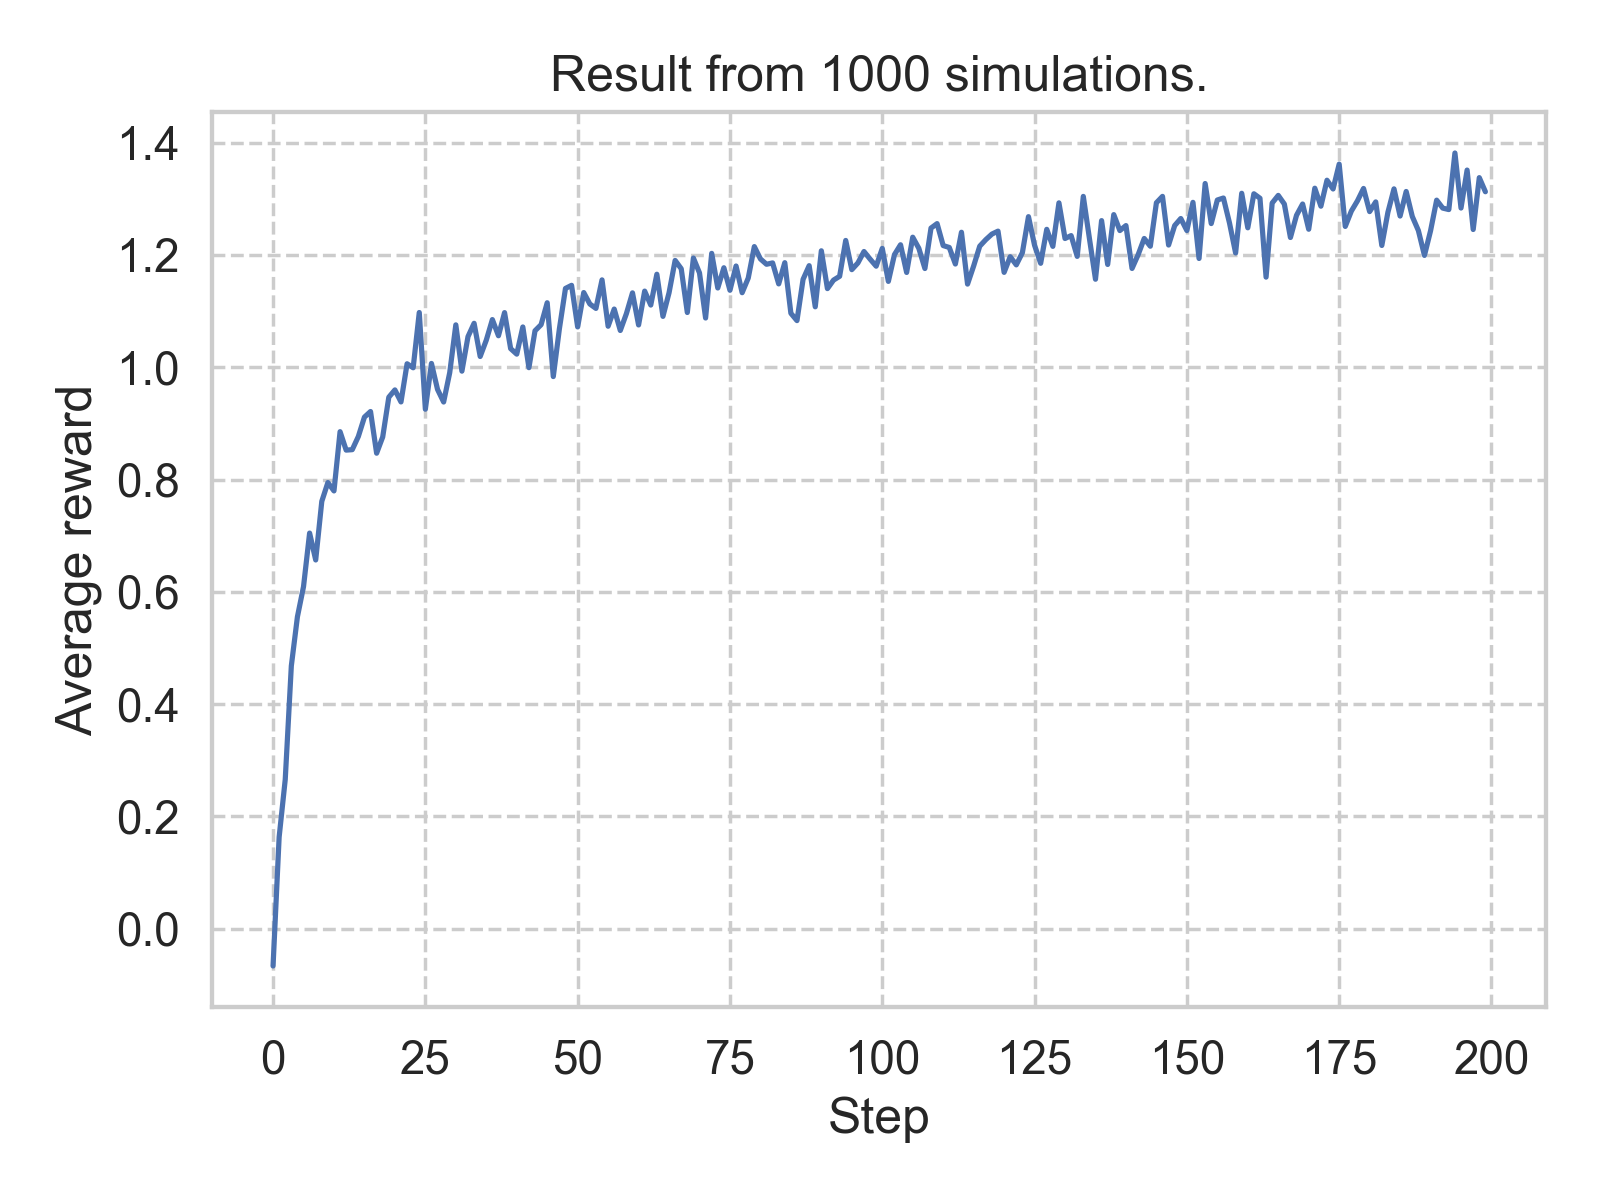

In [8]:
simulation_eps_greedy_1 = Simulation(
    env_type=TestBed,
    agent_type=EpsilonGreedyAgent,
    num_agents=n_simulations,
    init_value=None,
    step=n_steps,
    env_kwargs={'num_arms': 10},
    agent_kwargs={'epsilon': 0.1},
)

simulation_eps_greedy_1.run_all_agents()
steps_eps_greedy_1, avg_rewards_eps_greedy_1 = simulation_eps_greedy_1.aggregate_rewards(make_plot=True)

Simulation running: 100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 79.51it/s]


<IPython.core.display.Javascript object>


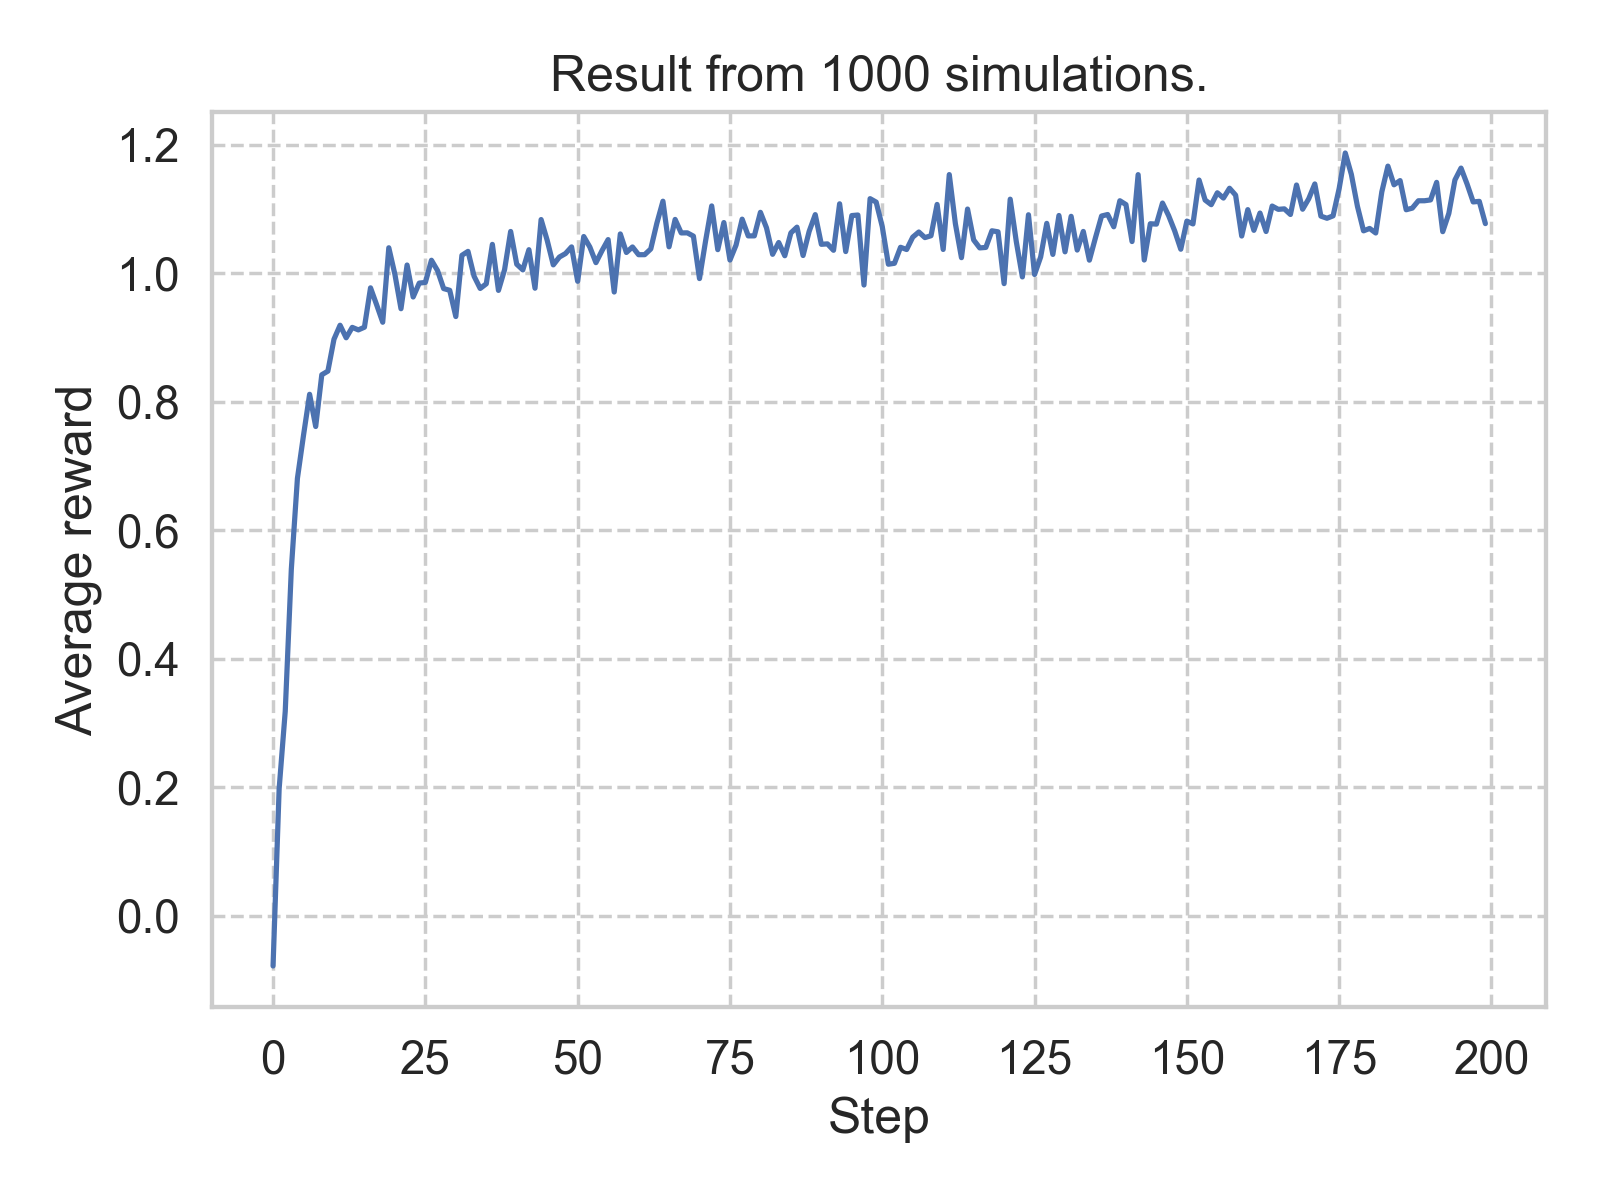

In [9]:
simulation_eps_greedy_2 = Simulation(
    env_type=TestBed,
    agent_type=EpsilonGreedyAgent,
    num_agents=n_simulations,
    init_value=None,
    step=n_steps,
    env_kwargs={'num_arms': 10},
    agent_kwargs={'epsilon': 0.01},
)

simulation_eps_greedy_2.run_all_agents()
steps_eps_greedy_2, avg_rewards_eps_greedy_2 = simulation_eps_greedy_2.aggregate_rewards(make_plot=True)

<IPython.core.display.Javascript object>


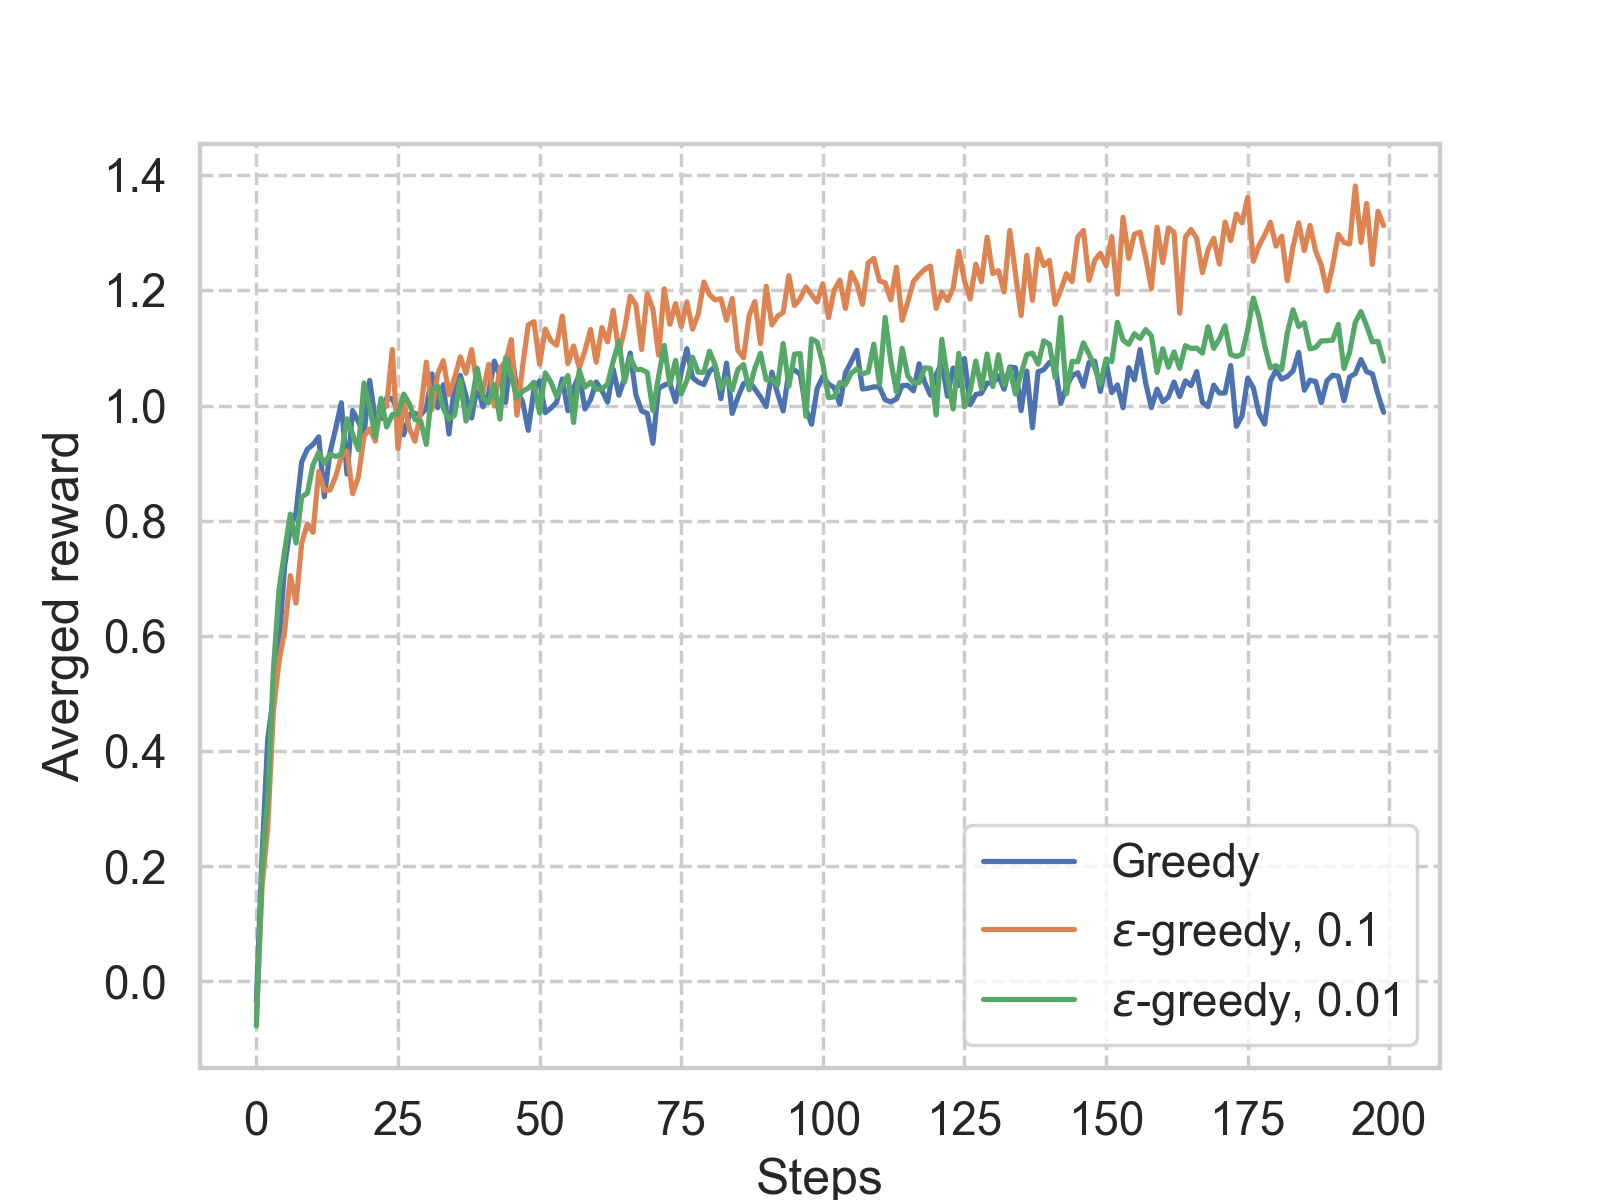

In [10]:
plt.figure()
sns.lineplot(x=steps_greedy, y=avg_rewards_greedy, label="Greedy")
sns.lineplot(x=steps_eps_greedy_1, y=avg_rewards_eps_greedy_1, label="$\epsilon$-greedy, 0.1")
sns.lineplot(x=steps_eps_greedy_2, y=avg_rewards_eps_greedy_2, label="$\epsilon$-greedy, 0.01")

plt.xlabel("Steps")
plt.ylabel("Averged reward")
plt.show()

In [11]:
simulation_ucb = Simulation(
    env_type=TestBed,
    agent_type=UCBAgent,
    num_agents=n_simulations,
    init_value=None,
    step=n_steps,
    env_kwargs={'num_arms': 10},
    agent_kwargs={'c': 2.},
)

simulation_ucb.run_all_agents()
steps_ucb, avg_rewards_ucb = simulation_ucb.aggregate_rewards(make_plot=False)

Simulation running: 100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 33.18it/s]


<IPython.core.display.Javascript object>


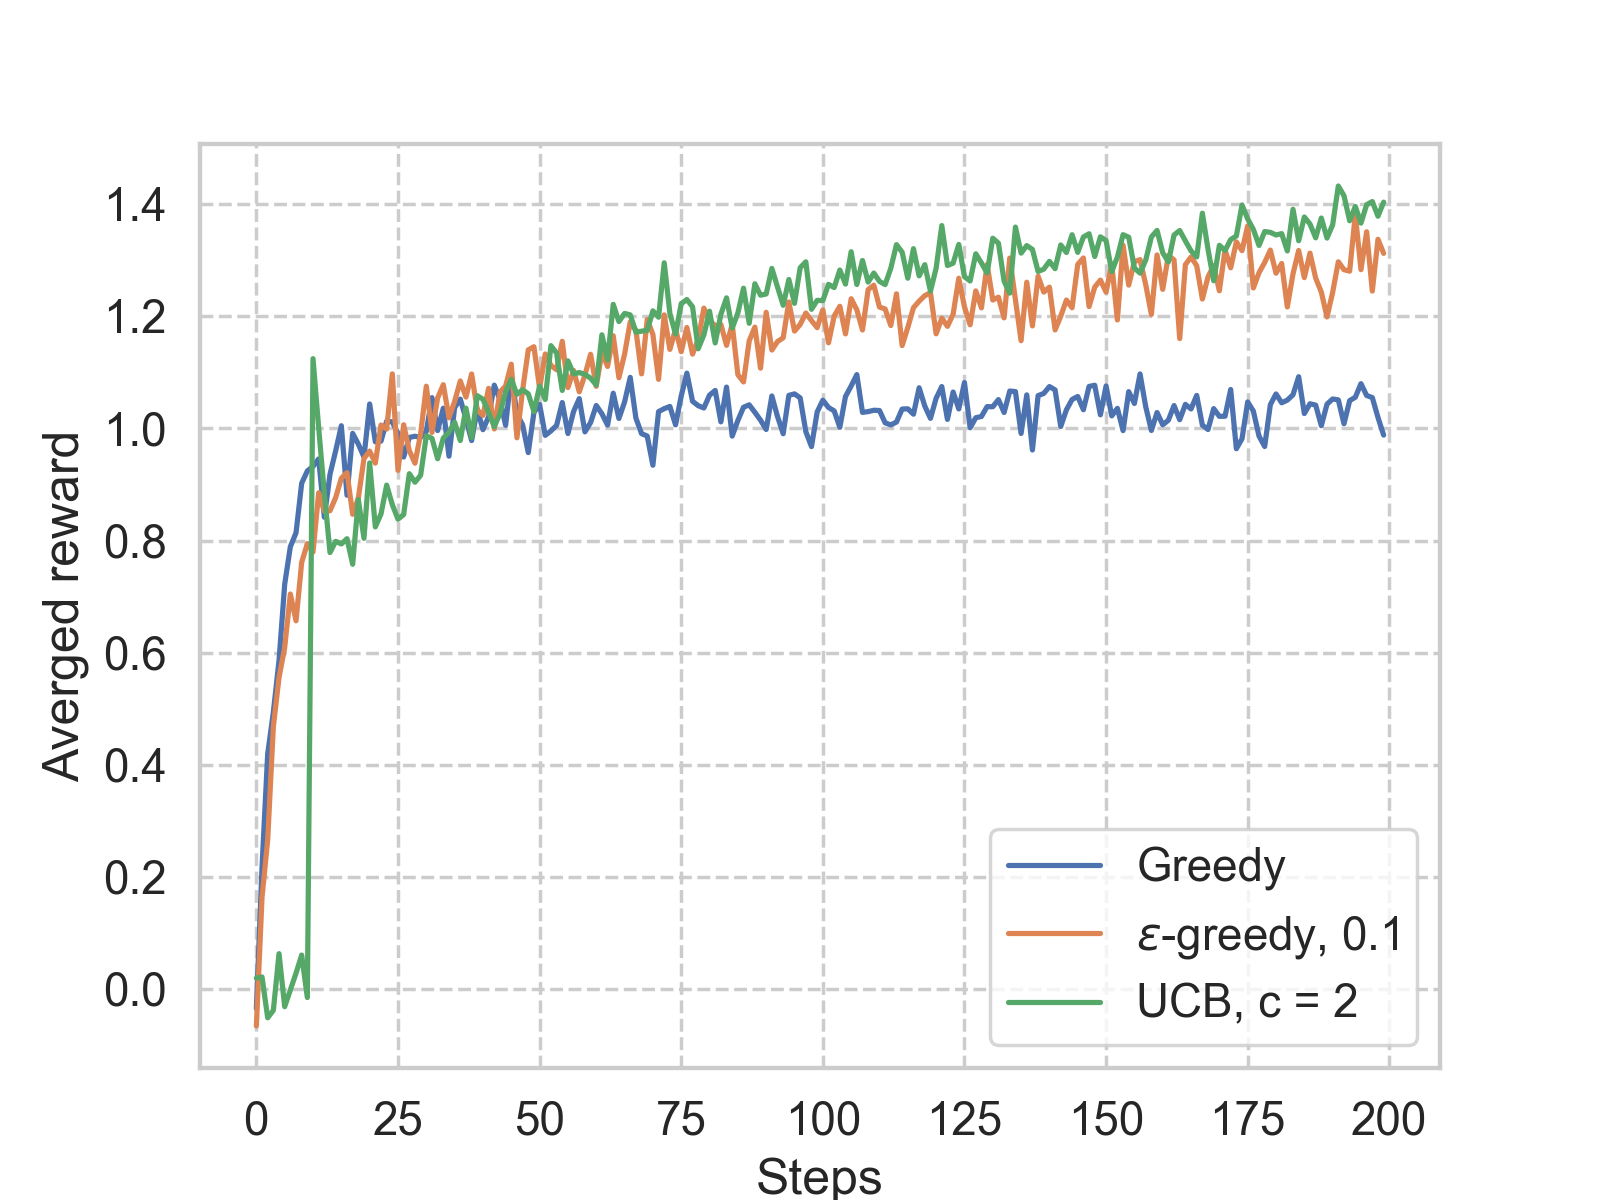

In [12]:
plt.figure()
sns.lineplot(x=steps_greedy, y=avg_rewards_greedy, label="Greedy")
sns.lineplot(x=steps_eps_greedy_1, y=avg_rewards_eps_greedy_1, label="$\epsilon$-greedy, 0.1")
sns.lineplot(x=steps_ucb, y=avg_rewards_ucb, label="UCB, c = 2")

plt.xlabel("Steps")
plt.ylabel("Averged reward")
plt.show()